<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Notebooks/01_Neural_Network_Regression_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [317]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.4.1


# Neural Network Regression with Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: 
- Predicting a numerical variable based on some other combinations of variable's even shorter ---> Predicting a number

### Example's of Regression Problem

* **How much** will this house sell for? 
* **How many** people will buy this app? 
* **How much** will my health insurance be?
* **How much** should I save each week for fuel?

It predicts a number. But there are other problems we can turn it into regression problem. For instance, 
- Trying to predict the **coordinates** of where the boxes should be in a object detection problem. 

### What we're going to cover?

- Architecture of neural network regression model. 
- Input and output shapes of a regression model(features and labels).
- Creating custom data to view and fit. 
- Steps in **modelling**
  - Creating a model.
  - Compiling a model. 
  - Fitting a model. 
  - Evaluating a model. 
- Different Evaluation methods. 
- Saving and loading models 

### **Creating the data to view and fit**

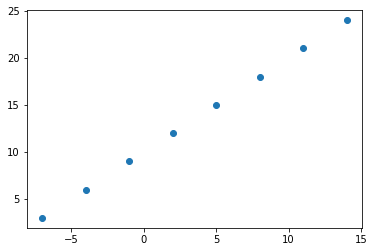

In [318]:
# Importing packages 
import numpy as np 
import matplotlib.pyplot as plt

# Create dummy features 
X = np.array([-7.0 , -4.0 , -1.0 , 2.0 , 5.0 , 8.0 , 11.0 , 14.0])

# Create labels 
y = np.array([3.0 , 6.0 , 9.0 , 12.0 , 15.0 , 18.0 , 21.0 , 24.0])

# Visualizing x and y 
plt.scatter(X , y)

In [319]:
X + 10 # we will get Y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [320]:
# This is the relationship between our X and Y, we want our neural net to learn 

y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### **Input and Output Shapes**

In [321]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(['bedroom' , 'bathroom' , 'garage'])
house_price = tf.constant([939700])

house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [322]:
 # Input and Output Shape 

input_shape = X.shape 
output_shape = y.shape

input_shape , output_shape

((8,), (8,))

In [323]:
# Taking one sample 
X[0] , y[0] # X[0] --> to predict --> y[0]

(-7.0, 3.0)

In [324]:
# Converting those numpy array into tensors 

X = tf.constant(X)
y = tf.constant(y)

X = tf.cast(X , dtype=tf.float32) 
y = tf.cast(y, dtype=tf.float32)

In [325]:
# Checking the shapes 
input_shape = X[0].shape
output_shape = y[0].shape

input_shape , output_shape

(TensorShape([]), TensorShape([]))

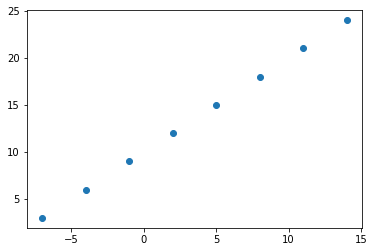

In [326]:
# How might we build a model which will figure out the below relationship? 

plt.scatter(X , y)

## Steps in Modelling with TensorFlow 🛠

1. **Creating a model** --> define the input and output layers, as well as the hidden layers of a neural network. 
2. **Compile our model** --> define the, 
 - loss function (a function which tells us how wrong our model is) more like a metric for our computer to improve the performance. 
 -  the optimizer (tells our model how to improve the patterns it's learning). 
 -  evaluation metrics (what we can use to interpret the performance of our model more like an metric for human to understand).
3. **Fitting a model** --> letting the model to find patterns between X and y (features and labels). 



In [327]:
# Setting the random seed 
tf.random.set_seed(42)

# 1. Create a model using the Sequential API 
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1) # In our case we take 1 number and predict 1 number
]) 

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae , # mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent 
              metrics = ['mae'] )  

# 3. Fitting the model 
model.fit(X , y , epochs = 5) # epochs (how many times you want me to see through your data? )

#

Epoch 1/5
1/1 [==============================] - 0s 268ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [328]:
# Writing in another format 

# model_add = tf.keras.Sequential()
# model_add.add(tf.keras.layers.Dense(1))


In [329]:
# Try and make predictions with our model 

y_pred = model.predict([17.0]) # X = 17.0
y_pred

array([[12.716021]], dtype=float32)

Our model predicts, if our `X` value is 17.0 then our `y` value should be 12.716021. Well it doesn't make sense, but looking at our loss function it really make sense. 

Our job will be decreasing the loss so that the results converge gradually as we reduce the loss. 

## Improving the model 

When we looked at the steps of modelling in TensorFlow which had those 3 steps, but when it's a time to improve our model. Likewise we can improve our model by going through all these 3 steps / altering them. 

1. **Creating a model** --> here we might, 
  - add more layers.
  - increase the number of hidden units(neurons) within each of hidden layers.
  - change the activation funciton of each layers 

2. **Compiling a model** --> here we might, 
  - change the optimization function 
  - play with the learning rate. 

3. **Fitting a model** --> here we might, 
  - Fit a model for more epochs. 
  - Give the model more data / examples to learn from
  

In [330]:
# Training for 100 epochs, rebuilding our model 

# 1. Creating the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.SGD() , 
              metrics = ['mae'])

# 3. Fit the model 
model.fit(X , y , epochs = 100)




Epoch 1/100
1/1 [==============================] - 0s 261ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 4m

As we increase the epochs, the loss came down. 

In [331]:
# Remind ourselves of the data 
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [332]:
# Let's see if our model predictions has been improved 
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [333]:
# Making certain changes in the model and let's see how it goes 

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100 , activation='relu'),                           
    tf.keras.layers.Dense(1) 
])

# 2. Compiling the model 
model.compile(loss=tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ['mae'])

# Fitting the model 
model.fit(X , y , epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 558ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - l

In [334]:
# Let's predict our model and see what's the improvement 

model.predict([17.0])

array([[31.223137]], dtype=float32)

Seems the model is overfitting, it learns well in the training data but during prediction or coming across new examples it does worse than our previous model.

Not everything considered as a improvement, sometimes the metrics aren't representative of our output / needs. 

In [335]:
# Making changes again removing and adding things 

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50 , activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam(lr = 0.01) , 
              metrics = ['mae'])

# 3. Fitting the model 
model.fit(X , y , epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 717ms/step - loss: 12.2895 - mae: 12.2895
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.5828 - mae: 11.5828
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8658 - mae: 10.8658
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1378 - mae: 10.1378
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3973 - mae: 9.3973
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 8.6426 - mae: 8.6426
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.8717 - mae: 7.8717
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.0828 - mae: 7.0828
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8696 - mae: 6.8696
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.2795 - mae: 7.2795
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - los

In [336]:
# Let's see our data 
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [337]:
# This model should be good since the loss is really low 
# Making predictions to see how positive the improvements are 

model.predict([20.0]) , model.predict([23.0])

(array([[31.03802]], dtype=float32), array([[34.185913]], dtype=float32))

## Evaluating the model 

In practice, a typical workflow we go through while building neural networks are: 

```
Build a model --> Fit it --> Evaluate it --> tweak a model --> Fit it --> Evaluate it --> tweak a model --> fit it --> Evaluate it....... 
```
When we it comes to evaluation ... there are 3 words we should memorize: 

```
Visualize <--> Visualize <--> Visualize
```
It's good idea to visualize:
* The data, 
  - What data we are working with?
  - What does it look like? 
* The model: 
  - What does our model look like? 
* The training of a model,
  - How does a model perform while it learns? 
* The predictions of the model, 
  - How does the model's predictiosn line up against the ground truth (the original labels). 


In [338]:
# Make a bigger dataset

X = tf.range(-100 , 100 , 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [339]:
# Making a label for our dataset 

y = X + 10 # this is the pattern we want our model to learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Let's do those above steps one by one! 

#### **Visualize the data**

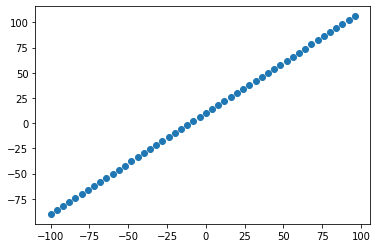

In [340]:
import matplotlib.pyplot as plt

# Plotting our data 
plt.scatter(X , y)

#### Splitting our data into sets 

In [341]:
# from sklearn.model_selection import train_test_split

# X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

# Checking the shape of those sets 
#print(f'The shape of X training set: {X_train.shape}')
#print(f'The shape of X test set: {X_test.shape}')
#print(f'The shape of y training set: {y_train.shape}')
#print(f'The shape of y test set: {y_test.shape}')

# Can't figure the error for now, maybe it's too small? 

In [342]:
# Split the data into train and test split 

# First 40 samples (80%)
X_train = X[:40]
y_train = y[:40]

# Last 10 samples (20%)
X_test = X[40:]
y_test = y[40:]

print(f'The shape of X training set: {X_train.shape}')
print(f'The shape of X test set: {X_test.shape}')
print(f'The shape of y training set: {y_train.shape}')
print(f'The shape of y test set: {y_test.shape}')


The shape of X training set: (40,)
The shape of X test set: (10,)
The shape of y training set: (40,)
The shape of y test set: (10,)


#### Visualize the training and test set! 

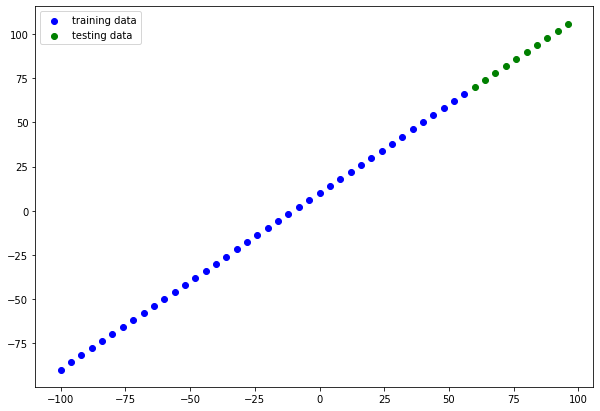

In [343]:
# Plotting 
plt.figure(figsize=(10 , 7))

# Training data in blue 
plt.scatter(X_train , y_train , c ='b' , label = 'training data') 

# Testiing data in green
plt.scatter(X_test , y_test , c='g' , label = 'testing data') 

# Show legend 
plt.legend();

In [344]:
# Let's have a look at how to build a neural network for our data 

# 1. Create the model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.SGD() , 
              metrics = ['mae'])

# 3. Fit the model 
# model.fit(X_train , y_train , epochs=100)


We have instantiate the model now rather fitting it to the mode, lets visualize it 

#### **Visualize the model**

In [345]:
# checking the summary / how our model built 

# model.summary() # Throws ERROR

In [346]:
# Getting over the error, we should build our model 

# model.build()

But we can do better, like create model which builts automatically by defining the `input_shape` argument in the first layer itself. 

In [347]:
# Checking the shape of our input data 

X[0] , y[0] # It's gonna be just 1 number, depends upon the variable's 

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [348]:
# Defining the input_shape
tf.random.set_seed(42)

# 1. Create a model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1 , input_shape =[1] )
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.SGD() , 
              metrics = ['mae'])


In [349]:
# Checking our model's summary 

model.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- **Total Params** --> total number of parameters in the model. 
- **Trainable params** --> these are the parameters (patterns model can update as they learn)
- **Non-trainable params** --> these parameters aren't updated during training (this is typical when we bring in already learn patterns or parameters from other models during `transfer learning`

In [350]:
# Fitting the model to training data 

model.fit(X_train , y_train , epochs = 100 , verbose = 0)

In [351]:
# Creating a model and playing around with the dense layers 

model = tf.keras.Sequential([
    #tf.keras.layers.Dense(100 , activation=None , input_shape= [1]),
  tf.keras.layers.Dense(10 , input_shape = [1] , name = 'input_layer') , 
  tf.keras.layers.Dense(1 , name = 'output_layer')
] , name = 'model_1')

model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.SGD() , 
              metrics = ['mae'])

# Getting the summary of our model / how it's built 
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [352]:
# Fitting this model 
model.fit(X_train , y_train , epochs = 100 , verbose = 0)

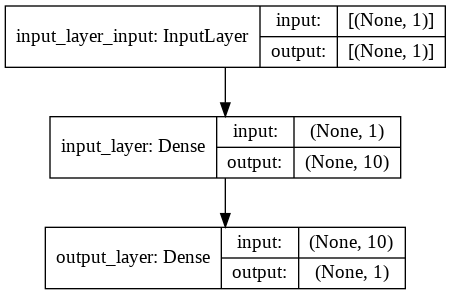

In [353]:
# Plotting the model with tensorflow plot_model utils

from tensorflow.keras.utils import plot_model
plot_model(model = model , show_shapes=True)

### **Visualizing our model's predictions**

To visualize predictions, it's a good idea to plot them against the ground truth labels. 

In practice we often see this in form our `y_test` Vs 'y_pred` (ground truth labels Vs predicted labels) 

In [354]:
# Make some predictions before comparing 

y_pred = model.predict(X_test)
y_pred

array([[ 70.48064 ],
       [ 75.06516 ],
       [ 79.64968 ],
       [ 84.234215],
       [ 88.81873 ],
       [ 93.40325 ],
       [ 97.98778 ],
       [102.5723  ],
       [107.15683 ],
       [111.741356]], dtype=float32)

We get a tensor in same format as `y_test`

In [355]:
# The ground truth label
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Rather going one by one, let's plot them to see how far our predictions are correct. 

🔑    **Daniel Note:** If you feel like you're going to reuse some functionality in the future, it's a good idea to turn it into a function. 

In [356]:
# Let's make a plot function 

def plot_predictions(train_data = X_train , train_labels = y_train , 
                     test_data = X_test , test_labels = y_test 
                     , predictions = y_pred):
  '''
  Plot's training data , test data and compares predictions to ground truth labels
  '''

  plt.figure(figsize = (10 , 7))

  # Plot training data in blue 
  plt.scatter(train_data , train_labels , c='b' , label = 'Training data')

  # Plot testing data in green 
  plt.scatter(test_data , test_labels , c='g' , label = 'Testing data')

  # Plot the model's prediction's in red
  plt.scatter(test_data , predictions , c='r' , label = 'Predictions')

  # Show the legend 
  plt.legend();

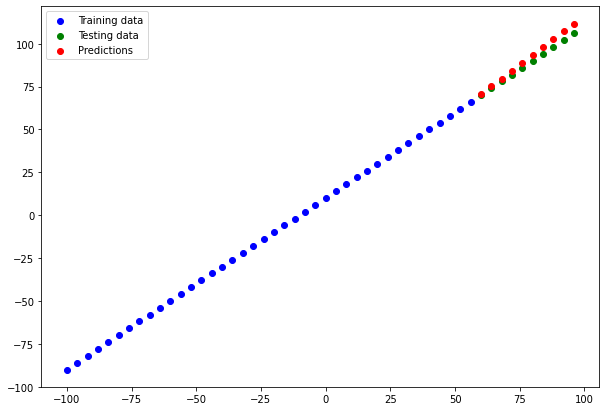

In [357]:
# Using our plot function
plot_predictions(X_train , y_train , X_test , y_test , y_pred) # positonal arguments

Looks good! But with just this plot we can't conclude that's a good working model unless we run them through certain **Evaluation Metrics**. 

#### **Trying to bring the red line closer to green (My Approach)** 

In [358]:
# Setting the seed 
tf.random.set_seed(42)

# Re-creating the model again 

model_improved = tf.keras.Sequential([
    tf.keras.layers.Dense(10 , input_shape=[1] , name='input_layer'),
    tf.keras.layers.Dense(50 , activation='relu',name = 'layer_1'),  
    tf.keras.layers.Dense(1 , name='output_layer')
])

# Compiling the model 
model_improved.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.Adam(lr = 0.01) , 
                metrics = ['mae'])

# Getting the summary of our model 
model_improved.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
layer_1 (Dense)              (None, 50)                550       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [359]:
# Fitting the model 
model_improved.fit(X_train , y_train , epochs=120 , verbose = 0)

In [360]:
# Getting the predictions 
y_pred_2 = model_improved.predict(X_test)
y_pred_2

array([[ 68.554726],
       [ 72.48498 ],
       [ 76.41522 ],
       [ 80.345474],
       [ 84.27573 ],
       [ 88.20597 ],
       [ 92.142166],
       [ 96.08885 ],
       [100.035545],
       [103.98224 ]], dtype=float32)

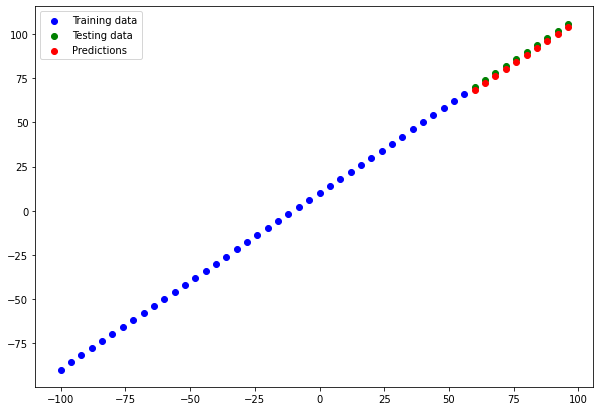

In [361]:
# Let's plot the function 
plot_predictions(X_train ,  y_train , X_test , y_test , y_pred_2)

Somehow improved the model by playing with the `learning_rate` and adding a activation function. 

### **Evaluating our model's predictions with regression evaluation metrics**

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance. 

Since now we're working a regression model, two of the main metrics's for now : 
- `MAE` - mean absolute error, **on average, how wrong is each of my model's predictions**
- `MSE` - mean squared error, **square the average errors and find the average**
- `Huber`- **combination of `MSE` and `MAE`**

**When to use**
- `MAE` --> Might be a great starter metric for any regression problem 
- `MSE` --> When larger error are more significant than smaller ones. 
- `Huber` --> these are less senstive to outlier's than `MSE`.


In [362]:
# Evaluate the model on test set 

model.evaluate(X_test , y_test) 

1/1 [==============================] - 0s 94ms/step - loss: 3.1110 - mae: 3.1110


[3.110996961593628, 3.110996961593628]

In [363]:
# Our improved model 
model_improved.evaluate(X_test , y_test) # Since loss_func and metrics are same

1/1 [==============================] - 0s 98ms/step - loss: 1.7469 - mae: 1.7469


[1.746913194656372, 1.746913194656372]

Using the metrics to calculate y_test Vs y_pred

In [364]:
mae = tf.keras.losses.MAE(y_test , y_pred)  # Soemthing isn't right...
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.61549 , 14.160902, 11.740128, 10.353157, 10.      , 10.680651,
       12.395111, 15.257843, 19.15683 , 23.741356], dtype=float32)>

In [365]:
# For our improved model 
mae_2 = tf.keras.losses.MAE(y_test , y_pred_2)
mae_2

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19.445274, 16.012018, 13.350866, 11.46181 , 10.344854, 10.      ,
       10.428433, 11.635541, 13.621327, 16.385792], dtype=float32)>

It doesn't show us the right differences, seems we are making mistake somewhere. 

In [366]:
# Checking prediction and test 

y_pred.shape , y_test.shape

((10, 1), TensorShape([10]))

If we notice the shape differs between `y_test` and `y_pred`, where `y_pred` has an extra axis. 

In [367]:
# We can remove 1 dim by squeeze 
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.48064 ,  75.06516 ,  79.64968 ,  84.234215,  88.81873 ,
        93.40325 ,  97.98778 , 102.5723  , 107.15683 , 111.741356],
      dtype=float32)>

In [368]:
# Calculating the mean absolute error after squeezing 

mae = tf.metrics.mean_absolute_error(y_true= y_test , 
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1109948>

In [369]:
# On our improved model 
tf.metrics.mean_absolute_error(y_true= y_test , 
                               y_pred = tf.squeeze(y_pred_2))

<tf.Tensor: shape=(), dtype=float32, numpy=1.7469101>

**Using `mean_squared_error`**

In [370]:
mse = tf.metrics.mean_squared_error(y_true= y_test , 
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=12.497052>

In [371]:
# trying it out for our improved model 

tf.metrics.mean_squared_error(y_true = y_test , 
                              y_pred = tf.squeeze(y_pred_2))

<tf.Tensor: shape=(), dtype=float32, numpy=3.0859225>

**Using `Huber`**

In [372]:
huber = tf.losses.huber(y_true=y_test , y_pred= tf.squeeze(y_pred))
huber

<tf.Tensor: shape=(), dtype=float32, numpy=2.6244817>

In [373]:
# On our improved model 
tf.keras.losses.huber(y_true= y_test , y_pred = tf.squeeze(y_pred_2))


<tf.Tensor: shape=(), dtype=float32, numpy=1.2469101>

Let's make some functions to hold those all evaluation metrics and make our job's easier. 

In [374]:
# Mean absolute error 
def mae(y_true , y_pred):
  return tf.metrics.mean_absolute_error(y_true= y_true , y_pred = tf.squeeze(y_pred))

# Mean Squared erro 
def mse(y_true , y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true , y_pred =tf.squeeze(y_pred))

In [375]:
# Tryna use those metrics 

mse(y_test , y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=12.497052>

### **Running experiments to improve our model** 

```
Build a model --> fit it --> evaluate it --> tweak it --> fit it --> evaluate it --> tweak it --. fit it --> evaluate it.......
``` 

1. **Get more examples our model to train** on (more opportunities to learn patterns or relationship between features and labels). 
2. **Make your model larger** (using more complex model) - this might come : 
  - add layers. 
  - more hidden units in each layer. 
3. **Train for longer** , give your model more of a change to find patterns in the data


Let's do a 3 modelling experiments: 
1. `model_1` - same as original model, 1 layer but trained for 100 epochs. 
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers , 500 epochs

In [376]:
# Seeing our data 
X_train , y_train # We can't get more data in this

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**Build `model_1`** same as original model, 1 layer but trained for 100 epochs.

In [377]:
# Setting the seed 
tf.random.set_seed(42)

# Creating model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compiling the model 
model_1.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.SGD() , 
                metrics = ['mae'])

# Fitting the model 
model_1.fit(X_train , y_train , epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss:

Firstly, make some predictions with our model and the visualize 

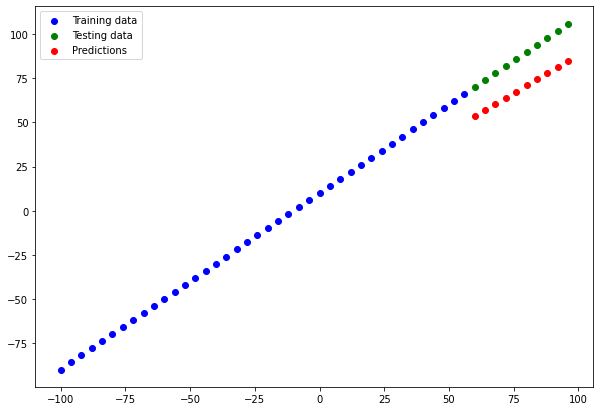

In [378]:
# Predictions for model_1 
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=  y_preds_1)

Not a good move, let's check some evaluation metrics. 

In [379]:
# Our evaluation metrics 

mae_1 = mae(y_test , y_preds_1)
mse_1 = mse(y_test , y_preds_1)

mae_1 , mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`** 2 layers, trained for 100 epochs.

In [380]:
# Setting the seed 
tf.random.set_seed(42)

# Creating a model 
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10 , input_shape = [1]) , 
  tf.keras.layers.Dense(1)
])

# Compiling the model 
model_2.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.SGD() , 
                metrics = ['mae'])

# Fitting the model 
model_2.fit(X_train , y_train , epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 26.8627 - mae: 26.8627
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 24.4175 - mae: 24.4175
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 31.5187 - mae: 31.5187
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 27.8490 - mae: 27.8490
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.6465 - mae: 14.6465
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.9682 - mae: 11.9682
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0874 - mae: 11.0874
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.3978 - mae: 11.3978
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 42.4087 - mae: 42.4087
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 28.3537 - mae: 28.3537
Epoch 11/100
2/2 [==============================] - 0s 3ms/

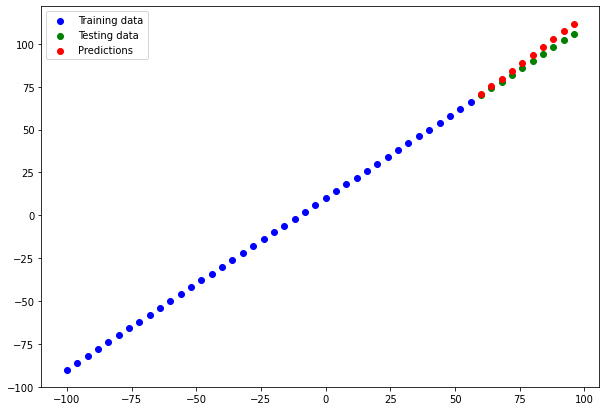

In [381]:
# Making predictions and visualizing 

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions= y_preds_2)

In [382]:
# Checking our evaluation metrics 
mae_2 = mae(y_test , tf.constant(y_preds_2))
mse_2 = mse(y_test , y_preds_2)

mae_2 , mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build `model_3`** 2 layers , 500 epochs

In [383]:
# Setting the seed 
tf.random.set_seed(42)

# Creating a model 
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100) , 
  tf.keras.layers.Dense(1)
])

# Compiling the model 
model_3.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.SGD() , 
                metrics = ['mse' ])

# Fitting the model 
model_3.fit(X_train , y_train , epochs = 500 , verbose = 0)

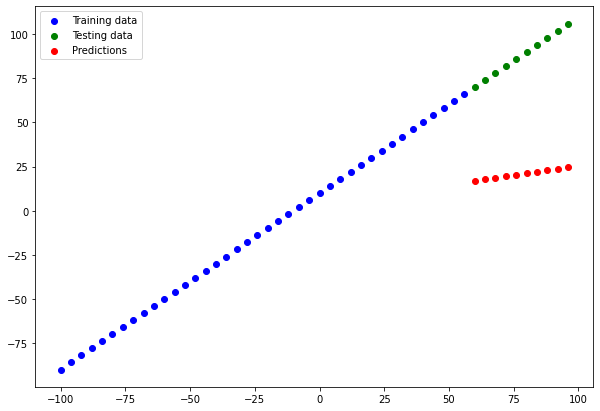

In [384]:
# Making predictions and plotting 
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions= y_preds_3)

Here the model is trained for too long... where our model is overfitting here. Does well on train data but couldn't generalize well on the test data.

In [385]:
# Evaluation metrics 
mae_3 = mae(y_test , y_preds_3)
mse_3 = mse(y_test , y_preds_3)

mae_3 , mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.21916>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4601.0557>)

**Using our improved model as our `model_4`** 3 layers, using `Adam()` , tweaked learning rate , 120 epochs

In [386]:
# Setting the seed 
tf.random.set_seed(42)

# Re-creating the model again 

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10 , input_shape=[1] , name='input_layer'),
    tf.keras.layers.Dense(50 , activation='relu',name = 'layer_1'),  
    tf.keras.layers.Dense(1 , name='output_layer')
])

# Compiling the model 
model_4.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.Adam(lr = 0.01) , 
                metrics = ['mae'])

# Getting the summary of our model 
model_4.summary()

# Fitting the model 
model_4.fit(X_train , y_train , epochs=120 , verbose = 0)

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
layer_1 (Dense)              (None, 50)                550       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


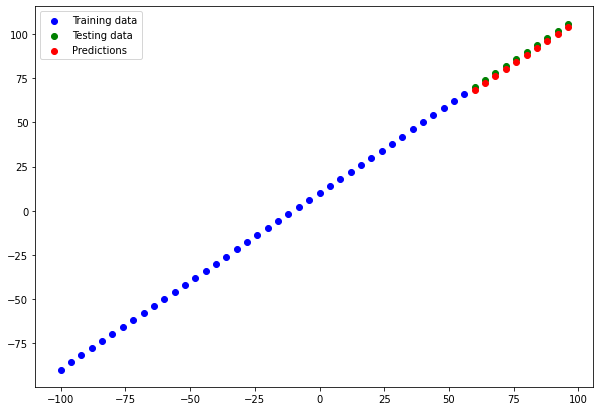

In [387]:
# Making predictions and plotting it 
y_preds_4 = model_4.predict(X_test)
plot_predictions(predictions= y_preds_4)

In [388]:
# Getting our evaluation metrics 
mae_4 = mae(y_test , y_preds_4)
mse_4 = mse(y_test , y_preds_4)

mae_4 , mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=1.7469101>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0859225>)

🔑  **Daniel Note:** You want to start with small experiments (small models) and make sure they work. And then increae their scale when necessary. 

Our moto is: 

**Experiment --> Experiment --> Experiment**



Now it became tedious with different model's for comparing them we should scroll back and check those metrics back and forth. 

#### **Comparing the results of our experiments**

We've run a few experiments, let's compare the results.

In [389]:
# Let' compare the result using a pandas DataFrame 
import pandas as pd 

model_results = [["model_1" , mae_1.numpy() , mse_1.numpy()] , 
                 ['model_2' , mae_2.numpy() , mse_2.numpy()] , 
                 ['model_3' , mae_3.numpy() , mse_3.numpy()] , 
                 ['model_4' , mae_4.numpy() , mse_4.numpy()]]

all_results = pd.DataFrame(model_results , columns = ['model' , 'mae' , 'mse'])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,67.219162,4601.055664
3,model_4,1.746910,3.085922


Look's like `model_4` performs best!!




> **🔑  Daniel Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you will figure out which don't work and in turn, get closer to figuring out what does work. 

Remember the ML practioner's motto: 
**Experiment --> Experiment --> Experiment**


## Tracking your experiments

One really good habit in machine learning model is to track the results of your experiment. When doing so, it can be tediou as you running lot's of experiments. Luckily there are tools to help us. 

📖  **Resources** As you build more model's you want to look into using. 

- `TensorBoard` - a component of the TensorFlow library to help track modelling experiments.
- `Weights and Biases` - a tool for tracking all kinds of ml experiments (plugs straight into TensorBoard)

## Saving our Models

Saving our model allows us to use them outside of Google Colab (or wherever they trained) so that we can use it on a web application or a mobile phones. 

There are two main formats we can save our model:
- The SaveModel format
- The HDF5 format



In [390]:
# Using the SavedModel format

model_4.save('best_model_savedmodel_format')

INFO:tensorflow:Assets written to: best_model_savedmodel_format/assets


In [391]:
# Using HDF5 

model_4.save('best_model_hdf5_frmt.h5')

To ensure that our model's have saved correctly is to load the model back 

In [392]:
# Loading the savedmodel format 

loaded_SavedModel_Format = tf.keras.models.load_model('best_model_savedmodel_format')

# Getting the summary 
loaded_SavedModel_Format.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
layer_1 (Dense)              (None, 50)                550       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [393]:
# Cross checking 
model_4.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
layer_1 (Dense)              (None, 50)                550       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


Compare `model_4` predictions with savedformat predictions

In [394]:
model_4_preds = model_4.predict(X_test)
loaded_model_preds = loaded_SavedModel_Format.predict(X_test)

# Checking whether they both are equal 
model_4_preds == loaded_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [395]:
# Checking the predictions
model_4_preds , loaded_model_preds

(array([[ 68.554726],
        [ 72.48498 ],
        [ 76.41522 ],
        [ 80.345474],
        [ 84.27573 ],
        [ 88.20597 ],
        [ 92.142166],
        [ 96.08885 ],
        [100.035545],
        [103.98224 ]], dtype=float32), array([[ 68.554726],
        [ 72.48498 ],
        [ 76.41522 ],
        [ 80.345474],
        [ 84.27573 ],
        [ 88.20597 ],
        [ 92.142166],
        [ 96.08885 ],
        [100.035545],
        [103.98224 ]], dtype=float32))

In [396]:
# Checking the metric mean absolute error 
mae(y_true = y_test , y_pred = model_4_preds) == mae(y_true = y_test , y_pred = loaded_model_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

Loading a model using the `h5` format

In [397]:
# Using h5 format 
loaded_h5_model = tf.keras.models.load_model('best_model_hdf5_frmt.h5')

# Summary 
loaded_h5_model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
layer_1 (Dense)              (None, 50)                550       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [398]:
# Checking model_4 summary 
model_4.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
layer_1 (Dense)              (None, 50)                550       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [399]:
# Checking whether loaded_model predictions are equal to saved one. 

loaded_h5_preds = loaded_h5_model.predict(X_test)
loaded_h5_preds

array([[ 68.554726],
       [ 72.48498 ],
       [ 76.41522 ],
       [ 80.345474],
       [ 84.27573 ],
       [ 88.20597 ],
       [ 92.142166],
       [ 96.08885 ],
       [100.035545],
       [103.98224 ]], dtype=float32)

In [400]:
# Checking them with one another, to check are they equal. 

model_4_preds == loaded_h5_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [401]:
 # Compare the MAE 

 mae(y_true = y_test , y_pred = model_4_preds) == mae(y_true = y_test , y_pred = loaded_h5_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

Let's try and put certain stuffs inside a function.

What should it do? 
- Save the model 
- Load back the model 
- prints out the model's summary
- Check their predictions


In [402]:
def loading_model_get_predictions(filepath = '' , model = model , X_test = X_test , y_test = y_test):
    
    def mae(y_test , y_pred):
        tf.keras.losses.mae(y_true = y_test , y_pred = tf.squeeze(y_pred))
    if filepath.endswith('.h5'):
      model.save(filepath)
      loaded_model = tf.keras.models.load_model(filepath)
      print(loaded_model.summary() , '\n')
      # Make predictiosn 
      loaded_model_preds = loaded_model.predict(X_test)
      model_preds = model.predict(X_test)
      # Comparing the loaded predictions real model prediction's 
      print('Comparing model and loaded model predictions: ',model_preds == loaded_model_preds , '\n')
      # Checking the metrics (for now MAE)
      print('Comparing models evaluation metrics (mae): ' , mae(y_test = y_test , y_pred=model_preds) == mae(y_test=y_test , y_pred = loaded_model_preds))

    else:
      model.save(filepath)
      loaded_model = tf.keras.models.load_model(filepath)
      print(loaded_model.summary() , '\n')
      # Make predictiosn 
      loaded_model_preds = loaded_model.predict(X_test)
      model_preds = model.predict(X_test)
      # Comparing the loaded predictions real model prediction's 
      print('Comparing model and loaded model predictions: ',model_preds == loaded_model_preds , '\n')
      # Checking the metrics (for now MAE)
      print('Comparing models evaluation metrics (mae): ' , mae(y_test = y_test , y_pred=model_preds) == mae(y_test=y_test , y_pred = loaded_model_preds))



In [403]:
loading_model_get_predictions(filepath='dum_savemodel_format' , model = model_4 , X_test = X_test , y_test = y_test)

INFO:tensorflow:Assets written to: dum_savemodel_format/assets
Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
layer_1 (Dense)              (None, 50)                550       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________
None 

Comparing model and loaded model predictions:  [[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]] 

Comparing models evaluation metrics (mae):  True


# A Larger Example! 🐘 

In [404]:
# Import the required libraries again 
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt

In [405]:
 # Read in the insurance dataset
 insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
 insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [406]:
# One hot encoding our data above, since it has objects in it

insurance_encoded = pd.get_dummies(insurance)
insurance_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#### **Taking on the challenge**

- Create X and y (features and labels)
- Split into train and test set 
- Build a simple (baseline) neural network model.

In [407]:
# Create X and y 
X = insurance_encoded.drop('charges' , axis = 1)
y = insurance_encoded['charges']

# Checking the shape 
X.shape , y.shape

((1338, 11), (1338,))

In [408]:
# Splitting into train and test split 
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y ,
                                          test_size = 0.2 , random_state = 42)

# Checking their shapes 
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

Building a simple neural net

In [409]:
# Setting the random seed 
tf.random.set_seed(42)

# 1. Create the model 
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)

])

# 2. Compiling the model 
insurance_model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.SGD() , 
              metrics = ['mae'])

# Fitting the model 
insurance_model.fit(X_train , y_train , epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 9987.2063 - mae: 9987.2063
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7677.4771 - mae: 7677.4771
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7033.4285 - mae: 7033.4285
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7941.9846 - mae: 7941.9846
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7687.9010 - mae: 7687.9010
Epoch 6/100
34/34 [==============================] - 0s 994us/step - loss: 7618.6535 - mae: 7618.6535
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7652.2086 - mae: 7652.2086
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7883.0142 - mae: 7883.0142
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7624.8944 - mae: 7624.8944
Epoch 10/100
34/34 [==============================] - 0s 992us/step - loss: 8297.8709 - mae: 8297.

In [410]:

# Check the result of insurance model on test data 
insurance_model.evaluate(X_test , y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8742.9365 - mae: 8742.9365


[8742.9365234375, 8742.9365234375]

Right now it look's like our model isn't doing well, so let's improve our model further! 

To try improve our model let's try 2 experiments: 
- Add an extra layer with more hidden units. 
- Same as above, but Train for longer
- Own experiments here

In [411]:
# Setting the random seed 
tf.random.set_seed(42)

# 1. Create a model 
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100) , 
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1)
])

# 2. Compiile the model 
insurance_model_2.compile(loss = tf.keras.losses.mae , 
                          optimizer = tf.keras.optimizers.Adam() , 
                          metrics = ['mae'])

# 3. Fitting the model 
insurance_model_2.fit(X_train , y_train , epochs = 100 , verbose = 1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12353.0242 - mae: 12353.0242
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7732.2964 - mae: 7732.2964
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

If we ever come across `loss` or your metrics became `nan` it means there is something wrong with the model. Our model is so large than our dataset that it can't teach it anything. Model is complex than datset.

But somehow by changing the optimizer it worked with the addition layer.

Building another model

In [412]:
# Set random seed 
tf.random.set_seed(42) 

# 1. Create a model 
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10) , 
  tf.keras.layers.Dense(1)
])

# 2. Compile the model 
insurance_model_3.compile(loss = tf.keras.losses.mae , 
                          optimizer = tf.keras.optimizers.Adam() , 
                          metrics = ['mae'])

# Fit the model 
history = insurance_model_3.fit(X_train , y_train , epochs = 200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12353.0242 - mae: 12353.0242
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7732.2964 - mae: 7732.2964
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

In [413]:
# Evaluate our 3rd model 
insurance_model_3.evaluate(X_test , y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [414]:
# First insurance model 
insurance_model_2.evaluate(X_test , y_test) , insurance_model.evaluate(X_test , y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8742.9365 - mae: 8742.9365


([4924.34765625, 4924.34765625], [8742.9365234375, 8742.9365234375])

Using the `history` to plot loss curve or training curve

Text(0.5, 0, 'epochs')

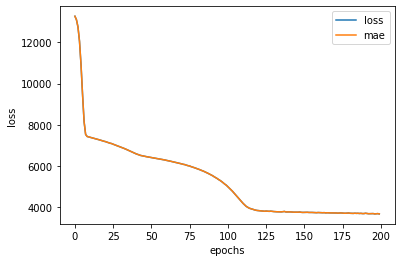

In [415]:
# Plotting history 
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

> 🤫 **Question:** How long should you train for? 

It depends, because ML / DL is very experimental. 
- TensorFlow has a solution for this which is called `EarlyStoppingCallback`, which is a tensorflow component we can add to our model to stop training once it stops improving.  

### Pre-processing (Normalization and Standardizaton)

We did things like one_hot_encoding and splitting data, but these additional steps will help us to get better results.

Things we gotta do to get our data ready:
- Turn all data into numbers
- Make sure all of our tensors are in right shape.
- Scale features (normalize,  standardize, neural network tend to prefer normalization)


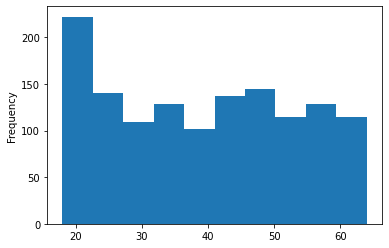

In [416]:
 # Distribution of age column 
 X['age'].plot(kind = 'hist')

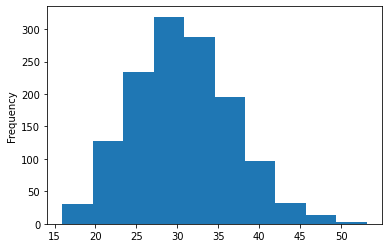

In [417]:
# Distribution of bmi column 
X['bmi'].plot(kind = 'hist')

If we observe those plot's above they aren't in same scale, but we can make them in same scale of values. 

For instance, get all those values between **0 to 1** 

Or in other words we would call this as **Feature Scaling**.

In terms of scaling values, neural network prefers **normalization**

In [418]:
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

In [419]:
# Reading in the data again 

insurance_data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data we can borrow few classes from Scikit-learn

In [420]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder

# Create a column transfomer 
ct = make_column_transformer(
    (MinMaxScaler() , ['age' , 'bmi' , 'children' ]), # turn all these column values btw 0-1 
    (OneHotEncoder(handle_unknown = 'ignore') ,  ['sex' , 'smoker' , 'region'])
)

# Create X and y values 
X = insurance_data.drop('charges' , axis=1)
y = insurance_data['charges']

# Splitting into train and test splits 
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X , y , test_size = 0.2 , 
                                                      random_state = 42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and Onehotencoder

X_train_normal = ct.transform(X_train) # normalizing and one hot encoding 
X_test_normal = ct.transform(X_test) 

# Checking shape 
X_train_normal.shape , X_test_normal.shape

((1070, 11), (268, 11))

In [423]:
# What does our scaled data look like 
# Numerical representation of our data below!

X_train_normal[0] , X_train.loc[0]

(array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]), age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object)

In [424]:
X_train_normal 

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [425]:
# Checking normalized Vs original shape 
X_train_normal.shape , X_train.shape

((1070, 11), (1070, 6))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes. 

### **Build a neural network model and fit it to our normalized data**


In [429]:
# Setting the random seed 
tf.random.set_seed(42)

# 1. Creating a model, starting small 
insurance_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1)
])

# 2. Compile the model 
insurance_model_1.compile(loss = tf.keras.losses.mae , 
                        optimizer = tf.keras.optimizers.Adam() , 
                        metrics = ['mae'])

# Fitting the model 
history = insurance_model_1.fit(X_train_normal , y_train , epochs = 100 , verbose = 0)

In [431]:
# Evaluating our model 
insurance_model_1.evaluate(X_test_normal , y_test)

9/9 [==============================] - 1s 1ms/step - loss: 11767.6777 - mae: 11767.6777


[11767.677734375, 11767.677734375]

Text(0.5, 0, 'epochs')

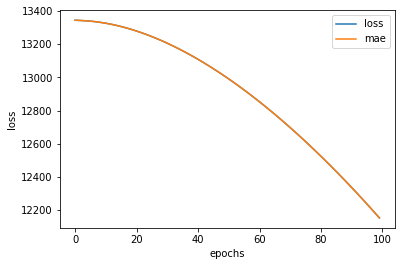

In [432]:
# Plotting the loss curve 
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Hmm, the loss seems spiking up let's create some more model's with little changes in them. 

In [437]:
# Setting the random seed 
tf.random.set_seed(42)

# Creating a model 
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(25) , 
    tf.keras.layers.Dense(1)
])

# Compile the model 
insurance_model_2.compile(loss = tf.keras.losses.mae , 
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) , 
                          metrics = ['mae'])

# Fitting the model for more epochs 
history = insurance_model_2.fit(X_train_normal , y_train , epochs = 200 , verbose = 0)


In [438]:
# Evaluating our model 
insurance_model_2.evaluate(X_test_normal , y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3169.7451 - mae: 3169.7451


[3169.7451171875, 3169.7451171875]

Text(0.5, 0, 'epochs')

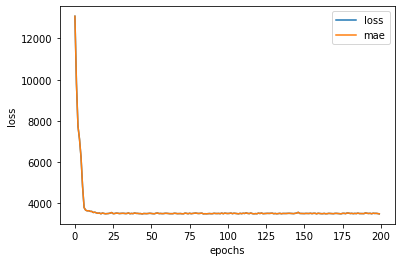

In [439]:
# Plotting the loss curve 
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [441]:
 X_train_normal.shape[0]

1070

Creating another model's with some more changes

In [503]:
# Setting the random seed 
tf.random.set_seed(42)


# Creating a model 
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100 , activation='relu'), 
  tf.keras.layers.Dense(50 , activation = 'relu'),
  tf.keras.layers.Dense(25 , activation = 'relu'),
  tf.keras.layers.Dense(10 , activation='relu') , 
  tf.keras.layers.Dense(1)
])

# Compiling the model 
insurance_model_3.compile(loss = tf.keras.losses.mae , 
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) , 
                          metrics = ['mae'])

# Fitting the model
history = insurance_model_3.fit(X_train_normal , y_train , epochs = 100 , verbose=0)

In [504]:
# Evalauting the model 
insurance_model_3.evaluate(X_test_normal , y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1727.8101 - mae: 1727.8101


[1727.81005859375, 1727.81005859375]

Text(0.5, 0, 'epochs')

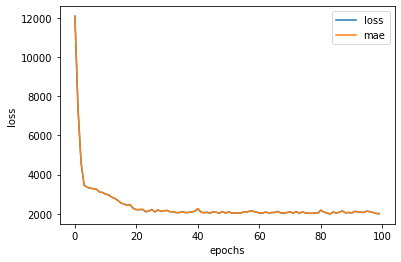

In [505]:
# Plotting the loss curve 
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Compare our model's result so far

In [506]:
# Storing the predictions 

insurance_preds_1 = insurance_model_1.predict(X_test_normal)
insurance_preds_2 = insurance_model_2.predict(X_test_normal)
insurance_preds_3 = insurance_model_3.predict(X_test_normal)

In [507]:
insurance_preds_1.shape , y_test.shape

((268, 1), (268,))

In [508]:
# Calculating the evaluation metric (mae)

insurance_mae_1 = tf.keras.losses.mae(y_true=y_test , y_pred= tf.squeeze(insurance_preds_1) )
insurance_mae_2 =  tf.keras.losses.mae(y_true=y_test , y_pred= tf.squeeze(insurance_preds_2) )
insurance_mae_3 =  tf.keras.losses.mae(y_true=y_test , y_pred= tf.squeeze(insurance_preds_3) )

insurance_mae_1 , insurance_mae_2 , insurance_mae_3

(<tf.Tensor: shape=(), dtype=float32, numpy=11767.679>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3169.7449>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1727.8098>)

In [509]:

model_results = [["insurance_model_1" , insurance_mae_1.numpy()] , 
                 ['insurance_model_2' , insurance_mae_2.numpy()] , 
                 ['insurance_model_3' , insurance_mae_3.numpy()] , 
                  ]

insurance_experiments = pd.DataFrame(model_results , columns = ['model' , 'mae'])
insurance_experiments

,model,mae
0,insurance_model_1,11767.678711
1,insurance_model_2,3169.744873
2,insurance_model_3,1727.809814


Will try to play with this later, but it's done for now! 

Great lecture! 